In [14]:
#Importing Data Visulaization Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Reading through the CSV
df = pd.read_csv('marraige.csv')
df.rename(columns={'Inter-Caste': 'Inter_Caste', 'Inter-Religion': 'Inter_Religion'}, inplace=True)
df.head()

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter_Caste,Inter_Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes


<Axes: >

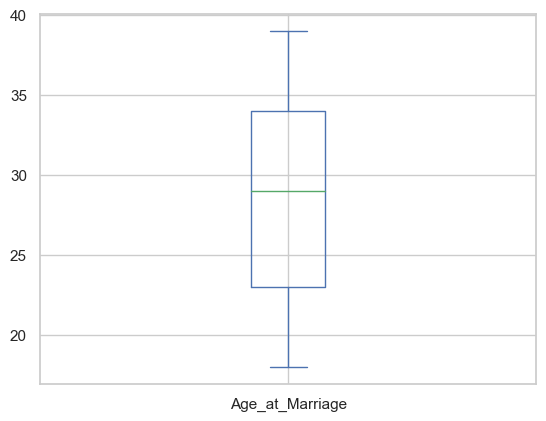

In [25]:
#Testing to see if the data can be read through
df['Age_at_Marriage'].plot.box()

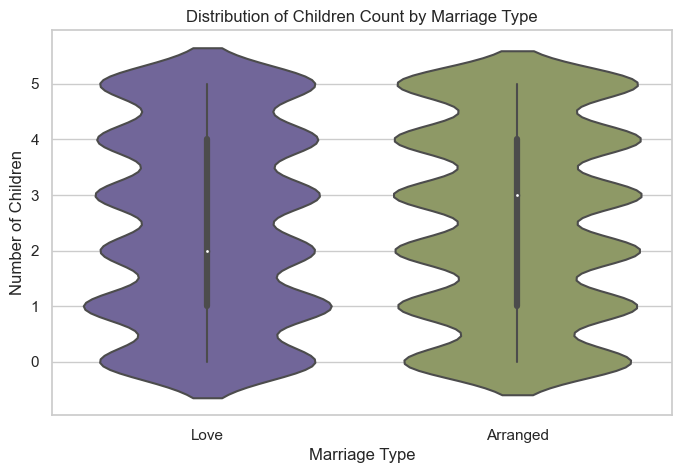

In [26]:
sns.set(style="whitegrid")

#Generating the Figure with Data
plt.figure(figsize=(8, 5))
sns.violinplot(x='Marriage_Type', y='Children_Count', data=df, palette=["#6C5EA1", "#93A15E"])

#Labels
plt.xlabel("Marriage Type")
plt.ylabel("Number of Children")
plt.title("Distribution of Children Count by Marriage Type")

plt.show()

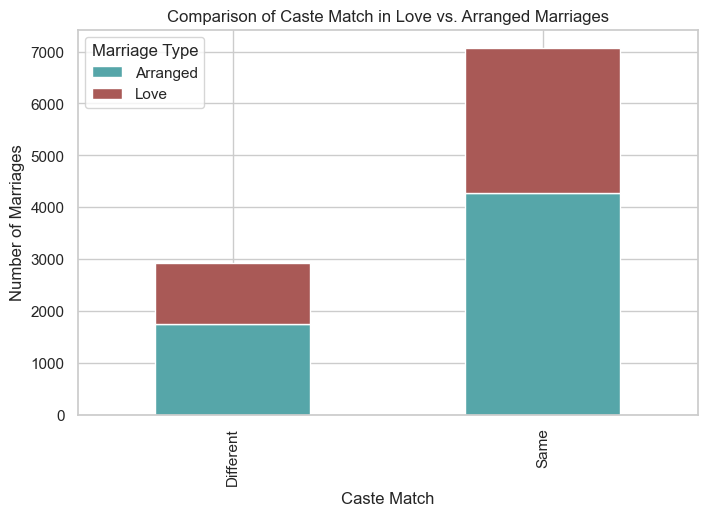

In [29]:
#Creating Pivot Table between Caste Match and Marriage Type
pivot_df = df.pivot_table(index='Caste_Match', columns='Marriage_Type', aggfunc='size', fill_value=0)

#Aesthetics
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#56A6A9','#A95956'])

#Labels
plt.ylabel("Number of Marriages")
plt.xlabel("Caste Match")
plt.title("Comparison of Caste Match in Love vs. Arranged Marriages")
plt.legend(title="Marriage Type")
plt.show()

In [33]:
#Building off of previous pivot table
df_melted = pivot_df.melt(id_vars=['Caste_Match', 'Religion'], var_name='Marriage_Type', value_name='Count')

plt.figure(figsize=(10, 6))

#Aesthetics
sns.barplot(x="Caste_Match", y="Count", hue="Religion", data=df_melted, 
            palette=['#8B9D62', '#629D92', '#74629D', '#9D626D', '#A2B181'], 
            dodge=True, width=0.6)

#Labels
plt.xlabel("Caste Match")
plt.ylabel("Number of Marriages")
plt.title("Marriage Type Comparison by Caste & Religion")
plt.legend(title="Religion")

plt.show()

KeyError: "The following 'id_vars' are not present in the DataFrame: ['Caste_Match', 'Religion']"

C:\Users\sreeh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sreeh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sreeh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 87.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sreeh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


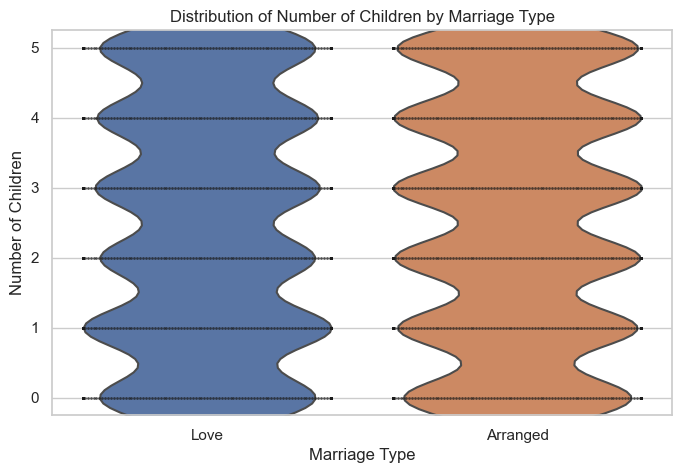

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))

sns.violinplot(x='Marriage_Type', y='Children_Count', data=df, palette='deep', inner=None)

sns.swarmplot(x='Marriage_Type', y='Children_Count', data=df, color='k', alpha=0.7, size=2)

plt.xlabel("Marriage Type")
plt.ylabel("Number of Children")
plt.title("Distribution of Number of Children by Marriage Type")

plt.show()

In [26]:
three_way_comparison = pd.pivot_table(
    df,
    values='ID',  # or any unique column
    index=['Inter_Caste', 'Inter_Religion'],
    columns='Marital_Satisfaction',
    aggfunc='count',
    fill_value=0
)

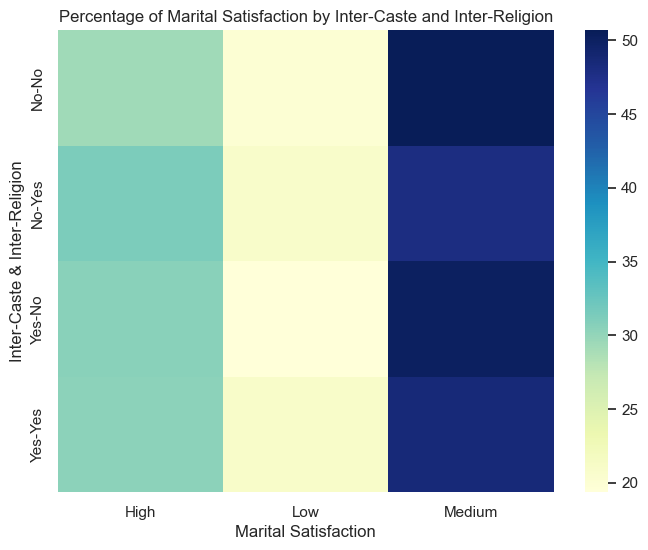

In [34]:
comparison_df = three_way_comparison.reset_index()

melted_df = comparison_df.melt(
    id_vars=['Inter_Caste', 'Inter_Religion'],
    value_vars=['High', 'Medium', 'Low'],
    var_name='Marital_Satisfaction',
    value_name='Count'
)

percentage_df = melted_df.copy()
percentage_df['Group_Total'] = percentage_df.groupby(['Inter_Caste', 'Inter_Religion'])['Count'].transform('sum')
percentage_df['Percentage'] = (percentage_df['Count'] / percentage_df['Group_Total']) * 100

heatmap_data = percentage_df.pivot_table(
    index=['Inter_Caste', 'Inter_Religion'],
    columns='Marital_Satisfaction',
    values='Percentage'
)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=False, fmt=".1f", cmap="YlGnBu")
plt.title("Percentage of Marital Satisfaction by Inter-Caste and Inter-Religion")
plt.ylabel("Inter-Caste & Inter-Religion")
plt.xlabel("Marital Satisfaction")
plt.show()